In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# a, b in [0, 1]

def and_gate(vals):
    product = 1
    for value in vals:
        product *= value
    return product

def or_gate(vals):
    return np.max(vals)
    #return 1 - nor(vals)

def nand(vals):
    return 1 - and_gate(vals)

def nor(vals):
    return 1- np.max(vals)
    '''product = 1
    for value in vals:
        product *= (1-value)
    return product'''
    
gates = [and_gate, or_gate, nand, nor]

In [3]:
class Node:
    def __init__(self, index=None):
        self.index = index
        self.state = np.random.random()
        self.gate = np.random.choice(gates)
        self.ingoing_indices = []
        self.outgoing_indices = []
        
        
class Network:
    def __init__(self, size, num_inputs=2):
        self.size = size
        self.nodes = np.array([Node(index=i) for i in range(size)])
        self.state_history = [self.yield_states()]
        self.time = 0
        
        self.randomly_connect_nodes(num_inputs=num_inputs)
        
    def randomly_connect_nodes(self, num_inputs=2):
        for node in self.nodes:
            node.ingoing_indices = [np.random.randint(0, self.size) for _ in range(num_inputs)]
            for index in node.ingoing_indices:
                self.nodes[index].outgoing_indices.append(node.index)
                
    def timestep(self):
        updated_states = []
        for i in range(self.size):
            node = self.nodes[i]
            inputs = [self.nodes[node.ingoing_indices[0]].state, self.nodes[node.ingoing_indices[1]].state]
            updated_states.append(node.gate(inputs))
            
        self.state_history.append(updated_states)
        self.time += 1
            
        for i in range(self.size):
            self.nodes[i].state = updated_states[i]
            
    def show_connections(self):
        for node in self.nodes:
            print(node.ingoing_indices, node.outgoing_indices)
    
    def show_states(self):
        for node in self.nodes:
            print(node.state)
            
    def yield_states(self):
        states = []
        for node in self.nodes:
            states.append(node.state)
        return states

In [4]:
a = Network(25, num_inputs=4)
for _ in range(40):
    a.timestep()

Text(0.5, 0, 'Time')

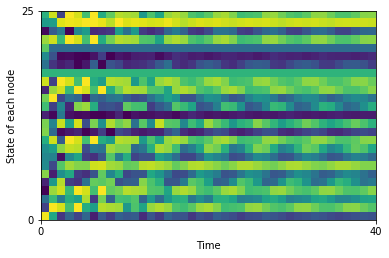

In [5]:
history_map = np.asarray(a.state_history).transpose()
history_map = np.flip(history_map, 0)
plt.imshow(history_map, extent=[0, a.time, 0, a.size])

plt.yticks([0, a.size])
plt.ylabel("State of each node")

plt.xticks([0, a.time])
plt.xlabel("Time")

In [6]:
a.show_connections()

[20, 11, 5, 16] [4, 6, 6, 6, 10, 12, 15]
[22, 6, 24, 1] [1, 9, 16]
[11, 21, 8, 12] [17, 21]
[21, 5, 16, 18] [13, 14]
[8, 16, 16, 0] [5, 5, 13, 18]
[21, 4, 7, 4] [0, 3, 7, 20, 24]
[11, 0, 0, 0] [1, 11, 22]
[5, 23, 17, 12] [5, 10, 16, 22]
[24, 13, 23, 20] [2, 4, 17, 22, 24]
[16, 22, 19, 1] [12, 15]
[16, 18, 7, 0] [13, 13, 18]
[13, 11, 6, 11] [0, 2, 6, 11, 11]
[0, 23, 9, 21] [2, 7, 17, 20, 23]
[10, 4, 10, 3] [8, 11, 19]
[21, 3, 19, 20] [18]
[21, 9, 24, 0] []
[22, 1, 7, 19] [0, 3, 4, 4, 9, 10, 19, 20, 21, 23, 23, 24]
[17, 12, 8, 2] [7, 17, 20]
[21, 4, 14, 10] [3, 10, 19]
[13, 18, 22, 16] [9, 14, 16, 23]
[17, 12, 16, 5] [0, 8, 14, 21, 21]
[16, 2, 20, 20] [2, 3, 5, 12, 14, 15, 18]
[7, 24, 6, 8] [1, 9, 16, 19]
[16, 19, 16, 12] [7, 8, 12]
[5, 16, 8, 24] [1, 8, 15, 22, 24]
